# Analyzing 2013 Election Manifestos for Pakistani Political Parties through Natural Language Processing


### Amir Akhter Kazi

In [1]:
import os
import nltk
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from nltk import pos_tag
from nltk.util import ngrams   

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from gensim.summarization.summarizer import summarize
from collections import Counter
import spacy
from textblob import TextBlob



class Manifesto(object):
    '''
    Creates a Manifesto object.
    Can be used to assess different aspects of a text file
        including tokens, most common words, parts of speech.
    '''
    
    def __init__(self, file_path, name):
        '''
        Initializes the object variables.
        '''
        self.name = name
        self.text = self.reading_file (file_path)
        self.tokens = self.tokenize (self.text)
        self.sentence_tokens = self.token_sentences(self.text)
        self.filtered_text = self.preprocessing (self.tokens)
        self.stemmed_list = self.stemmer(self.filtered_text)
        self.pos_tags = self.parts_of_speech_tagging(self.tokens)
        self.word_frequency = self.finding_word_frequency(self.filtered_text)
        
        
    def reading_file (self, file_path):
        '''
        Given a file path, checks if file exists there, reads it, closes it,
            and returns the text as a string.
        Input:
            file_path: string
        Return:
            text: string
        '''
        assert os.path.exists(file_path), "File not found at: "+str(file_path)
        f = open(file_path,'r')    
        text = f.read()
        f.close()
        return text
        
        
    def tokenize (self, text):
        '''
        Given some text, will return tokens of that text
        Input: 
            text: string
        Output:
            token: list of string
        '''
        tokens = nltk.word_tokenize(text)
        return tokens
    
    
    def token_sentences(self, text):
        '''
        Given some text, will return sentence tokens of that text
        Input:
            text: string
        
        Output:
            list of sentence tokens (string)
        '''
        sent_text = nltk.sent_tokenize(text)
        return sent_text

        
    def finding_word_frequency (self, filtered_text):
        '''
        Given a list, returns the word frequency
        Input:
            filtered_text: list of strings
        Output:
            word frequency: nltk.probability.FreqDist
        '''
        word_frequency = nltk.FreqDist(filtered_text)
        return word_frequency
        
        
    def parts_of_speech_tagging(self, tokens):
        '''
        Given tokens, assigns parts of speech to each token
        '''
        tagged = nltk.pos_tag(tokens)
        return tagged      
        
        
    def stemmer (self, filtered_text):
        '''
        Does stemming/lemmatization of a given text
        Input:
            filtered_text: list of string
        Output:
            a set of stemmed words
        '''
        st = RSLPStemmer()
        stemmed_list = set(st.stem(token) for token in filtered_text)
        return stemmed_list
        
        
    def preprocessing (self, text):
        '''
        Removes stop words and converts to lower case.
        Input:
            text: string
            
        Output:
            filtered_text: list of string
        '''
        stop_words = set(stopwords.words('english'))
        words=[word.lower() for word in text if word.isalpha()]
        filtered_text = [w for w in words if not w in stop_words]
        return filtered_text

        
    def find_most_frequent_words(self, number):
        '''
        For a given manifesto object, returns the most common X number of words used
            along with the count
        Input:
            number: integer
            
        Output:
            mostcommon: list
        '''
        wordfreqdist = nltk.FreqDist(self.filtered_text)
        mostcommon = wordfreqdist.most_common(number)
        return mostcommon
        
        
    def __repr__(self):
        
        return (self.name + ' Manifesto ')
    
    
    
def create_wordcloud(text, title = None, maximum_words = 100):
    '''
    Creates a word cloud based on the text of the file.
    Removes stop words (which consists of conventional stop words  
            and words from my own list)            
    Input:
        text (string)
        title (optional, string)
        maximum words (integer, default = 100)
        
    Special thanks to the community at stackoverflow
    (https://stackoverflow.com/questions/16645799/how-to-create
    -a-word-cloud-from-a-corpus-in-python)
    for this one!
    '''
    stop_words = list(STOPWORDS)
    personal_list = ['pakistan', 'people', 'party', 'manifesto', 'government', 'per', 
                    'cent', 'will', 'Parliamentarians', 'ANP', 'MQM', 'iii', 'i', 'ii', 'iv', 'v', 
                     'vi','vii', 'PML', 'PTI', 'ensure', 'right', 'provide', 'islami', 'Islami', 
                     'jamaat', 'Jamaat' ]
    stop_words_2 = set(stop_words + personal_list)


    wordcloud = WordCloud(
        background_color='white',
        stopwords=stop_words_2,
        max_words=maximum_words,
        scale=3,
        max_font_size=40
    ).generate(str(text))

    fig = plt.figure(1, figsize=(20, 20), dpi = 400)
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=30)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
    
def summarize_text (text):
    '''
    Given some text, will summarize it and return the summary
    Input:
        text (string)
    Output:
        summary (string)
    '''
    print (summarize(text, ratio = 0.05))


def getting_ngrams(text, gram_type, length_of_list):
    '''
    Given a text, given the type of gram (example, bigram, trigram, fourgram etc), 
    and given length of list,
        returns a list of the most common X ngrams in that text. 
        
    Input:
        text (string)
        gram_type (integer): indicates the number of grams
        length_of_list (integer): indicates the number of most common ngrams to show
    Output:
        ngram (list of string)
        
    Thanks to the Stackoverflow community at 
    'https://stackoverflow.com/questions/32441605/generating-ngrams-unigrams-bigrams-etc-
    from-a-large-corpus-of-txt-files-and-t'
    for help with this!
    '''
    gram = ngrams(text, gram_type)
    ngram = Counter(gram).most_common(length_of_list)
    print (ngram)


def manifesto_similarities():
    '''
    Prints similarity score between the manifestos of 
        different parties using manifesto text.
    Uses package 'spacy' to calculate similarity
    '''
    nlp = spacy.load('en')
    list_of_parties = [ppp, pmln, mqm, pti, anp, ji]
    tokens = [nlp(ppp.text), nlp(pmln.text), nlp(mqm.text), nlp(pti.text), nlp(anp.text), nlp(ji.text)]

    counter_1 = 0
    print ('{} {:>30} {:>40}'.format('PARTY 1', 'PARTY 2','SIMILARITY SCORES'))
    print ()
    for token1 in tokens:    
        counter_2 = 0
        for token2 in tokens:
            print ('{:30} {:30} {:.5}'.format(list_of_parties[counter_1].name, 
                                              list_of_parties[counter_2].name,token1.similarity(token2) ))
            counter_2 = counter_2 + 1
        counter_1 = counter_1 + 1
        print ()
        
        
def sentiment_analysis (sentence_tokens, name):
    '''
    Given sentence tokens, calculates polarity and subjectivity of each sentence in the document,
        and plots graphs of polarity and subjectivity
    Input:
        sentence_tokens: list of strings
        name: the name of each party (string)
    '''
    polarity = []
    subjectivity = []
    for sentence in sentence_tokens:
        s = TextBlob(sentence)
        polarity.append(s.sentiment[0])
        subjectivity.append(s.sentiment[1])
        
    plt.plot(polarity)
    plt.xlabel('Sentences across manifesto')
    plt.ylabel('Polarity')
    plt.title(' Manifesto of '+ name)
    plt.show()


    plt.plot(subjectivity, 'C7')
    plt.xlabel('Sentences across manifesto')
    plt.ylabel('subjectivity')
    plt.title(' Manifesto of '+ name)
    plt.show()

In [2]:
# CREATING MANIFESTO OBJECTS OF THE POLITICAL PARTIES
ppp = Manifesto ('/Users/kazi/Desktop/Manifesto Text Files/PPP_2013.txt', 'Pakistan Peoples Party')
pmln = Manifesto ('/Users/kazi/Desktop/Manifesto Text Files/PMLN_2013.txt', 'Pakistan Muslim League N')
mqm = Manifesto ('/Users/kazi/Desktop/Manifesto Text Files/MQM_2013.txt', 'Mutahhida Qaumi Movement')
pti = Manifesto ('/Users/kazi/Desktop/Manifesto Text Files/PTI_2013.txt', 'Pakistan Tehreek-e-Insaaf')
anp = Manifesto ('/Users/kazi/Desktop/Manifesto Text Files/ANP_2013.txt', 'Awami National Party')
ji = Manifesto ('/Users/kazi/Desktop/Manifesto Text Files/JI_2013.txt', 'Jamat-ul-Islami')

In [3]:
list_of_parties = [ppp, pmln, mqm, pti, anp, ji]

### PRELIMINARY DEMO ON EXAMPLE MANIFESTO

Before moving on with the analysis, I wanted to do a demo of how the Manifesto Class works, by testing it out on a sample party. In my case, I chose ANP (but it could be done with any of the party objects).

In [4]:
# Uses the ___repr___ function to return the name of the party along with the string 'Manifesto'
anp

Awami National Party Manifesto 

In [5]:
# Prints the text that was read from the ANP Text File
# Prints only the first 1000 characters for clarity
print (anp.text[:1000])

Awami National Party’s
Elections Manifesto
2013

ANP’s Elections Manifesto 2013

The purpose of this Manifesto is to inform the public about the aims and objectives of
the Awami National Party (ANP) so that voters in the forthcoming General Elections
will know clearly what the Party stands for. The manifesto does not purport to be a
detailed programme of action. It seeks only to describe the spirit that motivates the
Party and the overall principles that will govern its policies, should it be called upon
to serve the people of Pakistan, either singly or in partnership with others.
The Manifesto is divided into the following parts:The Preamble
I Internal Affairs
1.
Peace and Security
2.
Political, Legal and Administrative
3.
Social, Economic & Fiscal Reforms
4.
Provincial Autonomy
i.
Education
ii.
Health
iii.
Population Planning and Well-Being
iv.
Labour Rights and Development
v
Youth Development & Employment
vi
Agriculture
vii.
Environment
viii.
Industry & technical advancement
ix.
Ar

In [6]:
# Prints the word tokens in the ANP Text File
# Shows only the first 20 tokens for clarity
anp.tokens[:20]

['Awami',
 'National',
 'Party',
 '’',
 's',
 'Elections',
 'Manifesto',
 '2013',
 'ANP',
 '’',
 's',
 'Elections',
 'Manifesto',
 '2013',
 'The',
 'purpose',
 'of',
 'this',
 'Manifesto',
 'is']

In [7]:
# Prints the sentence tokens in the ANP text file
# Shows only the first 20 sentence tokens for clarity
anp.sentence_tokens[:20]

['Awami National Party’s\nElections Manifesto\n2013\n\nANP’s Elections Manifesto 2013\n\n\x0cThe purpose of this Manifesto is to inform the public about the aims and objectives of\nthe Awami National Party (ANP) so that voters in the forthcoming General Elections\nwill know clearly what the Party stands for.',
 'The manifesto does not purport to be a\ndetailed programme of action.',
 'It seeks only to describe the spirit that motivates the\nParty and the overall principles that will govern its policies, should it be called upon\nto serve the people of Pakistan, either singly or in partnership with others.',
 'The Manifesto is divided into the following parts:The Preamble\nI Internal Affairs\n1.',
 'Peace and Security\n2.',
 'Political, Legal and Administrative\n3.',
 'Social, Economic & Fiscal Reforms\n4.',
 'Provincial Autonomy\ni.',
 'Education\nii.',
 'Health\niii.',
 'Population Planning and Well-Being\niv.',
 'Labour Rights and Development\nv\nYouth Development & Employment\nvi\nA

In [8]:
# Prints the word tokens after pre-processing and text cleaning
# Shows only the first 20 tokens for clarity
anp.filtered_text[:20]

['awami',
 'national',
 'party',
 'elections',
 'manifesto',
 'anp',
 'elections',
 'manifesto',
 'purpose',
 'manifesto',
 'inform',
 'public',
 'aims',
 'objectives',
 'awami',
 'national',
 'party',
 'anp',
 'voters',
 'forthcoming']

In [24]:
# Prints a list of 'stemmed' word tokens
# Shows only the first 20 stemmed words for clarity
list(anp.stemmed_list)[:20]

['vision',
 'indispensibl',
 'suffering',
 'corpor',
 'method',
 'possibl',
 'wherev',
 'proactively',
 'duti',
 'low',
 'dialog',
 'pakistan',
 'fcr',
 'liberal',
 'oliv',
 'continu',
 'employment',
 'part',
 'comprehensiv',
 'feder']

In [10]:
# Does Parts of Speech Tagging on the first 20 tokens of the filtered text
anp.parts_of_speech_tagging(anp.filtered_text[:20])

[('awami', 'JJ'),
 ('national', 'JJ'),
 ('party', 'NN'),
 ('elections', 'NNS'),
 ('manifesto', 'VBP'),
 ('anp', 'JJ'),
 ('elections', 'NNS'),
 ('manifesto', 'VBP'),
 ('purpose', 'JJ'),
 ('manifesto', 'JJ'),
 ('inform', 'NN'),
 ('public', 'NN'),
 ('aims', 'VBZ'),
 ('objectives', 'NNS'),
 ('awami', 'VBP'),
 ('national', 'JJ'),
 ('party', 'NN'),
 ('anp', 'NN'),
 ('voters', 'NNS'),
 ('forthcoming', 'VBG')]

## ANALYSIS

### TEXT STATISTICS

I first explored the texts to see how many different word tokens are present in each manifesto. This was done to assess the length of each manifesto, and gain an understanding of how much time it might take a voter to read each of these (relative to each other). 


In [11]:
# Finding Number of Tokens in Each Party Manifesto
print ('{:30} {}'.format('PARTY', 'NUMBER OF TOKENS IN PARTY MANIFESTO') )
for party in list_of_parties:
    print ('{:30} {}'.format (party.name,  len(party.tokens)))


PARTY                          NUMBER OF TOKENS IN PARTY MANIFESTO
Pakistan Peoples Party         45796
Pakistan Muslim League N       24888
Mutahhida Qaumi Movement       9159
Pakistan Tehreek-e-Insaaf      9009
Awami National Party           8790
Jamat-ul-Islami                10950


I then did the same token count, but for unique words in each text, by converting uppercase to lowercase (to avoid repetition), and removing stop words such as ‘the’, ‘is’ etc.


In [12]:
# Finding Unique Words in Each Manifesto (Excludes Stop Words)
print ('{:30} {}'.format('PARTY', 'NUMBER OF UNIQUE IMPORTANT WORDS IN PARTY MANIFESTO') )
for party in list_of_parties:
    print ('{:30} {}'.format (party.name,  len(party.filtered_text)))

PARTY                          NUMBER OF UNIQUE IMPORTANT WORDS IN PARTY MANIFESTO
Pakistan Peoples Party         23124
Pakistan Muslim League N       12663
Mutahhida Qaumi Movement       4866
Pakistan Tehreek-e-Insaaf      4813
Awami National Party           4521
Jamat-ul-Islami                5889



Lastly, a similar analysis was done to find the number of sentences in each manifesto.


In [13]:
# Finding number of sentences in Each Manifesto
print ('{:30} {}'.format('PARTY', 'NUMBER OF SENTENCES IN PARTY MANIFESTO') )
for party in list_of_parties:
    print ('{:30} {}'.format (party.name,  len(party.sentence_tokens)))

PARTY                          NUMBER OF SENTENCES IN PARTY MANIFESTO
Pakistan Peoples Party         1720
Pakistan Muslim League N       1007
Mutahhida Qaumi Movement       504
Pakistan Tehreek-e-Insaaf      264
Awami National Party           598
Jamat-ul-Islami                769


These indicated that for the most part, similar trends remained across the three analyses. Interestingly, while the Pakistan Tehreek-e-Insaaf (PTI) had more words than either the Awami National Party (ANP) or Jamat-ul-Islami (JI), it had less than half as many sentences. What makes this interesting is that at the time of the 2013 elections, the PTI was targeting urban middle class voters. This might be indicative in the sort of phrasing and vocabulary they were using, with longer sentences and more complicated phrasing (or maybe I'm giving them too much credit). 

To further probe this observation, I divided the length of the ‘filtered text’ i.e. text after pre-processing by the number of sentence tokens. 


In [14]:
# Finding average number of words per sentence in Each Manifesto
print ('{:30} {}'.format('PARTY', 'AVERAGE NUMBER OF WORDS PER SENTENCE IN PARTY MANIFESTO') )
for party in list_of_parties:
    print ('{:30} {}'.format (party.name,  len(party.filtered_text)/len(party.sentence_tokens)))

PARTY                          AVERAGE NUMBER OF WORDS PER SENTENCE IN PARTY MANIFESTO
Pakistan Peoples Party         13.444186046511629
Pakistan Muslim League N       12.574975173783516
Mutahhida Qaumi Movement       9.654761904761905
Pakistan Tehreek-e-Insaaf      18.231060606060606
Awami National Party           7.5602006688963215
Jamat-ul-Islami                7.657997399219766


Those results further highlighted this trend. While more research needs to be done on this, it is possible that manifesto sentence lengths vary depending on the education level of the party’s target demographic. 

### WORD FREQUENCY & POSITIONING

##### MOST FREQUENT WORDS

Following this generic understanding of the text, I decided to look at word frequency to glean a granular picture.

In [15]:
'''
# Code commented out for clarity
# Remove first and last line to run code
# Prints word frequency for each word in each manifesto
for party in list_of_parties:
    print (party.name)
    display (party.word_frequency)
    print ('\n \n \n ')
'''

"\n# Remove first and last line to run code\n# Prints word frequency for each word in each manifesto\nfor party in list_of_parties:\n    print (party.name)\n    display (party.word_frequency)\n    print ('\n \n \n ')\n"

However, the above function was not that helpful since it gave details about each word in each manifesto, and did not mention words in the order of their frequency.
I then created the function used below to highlight the top K most frequent words in each manifesto. I chose 10 as the value for K.

In [16]:
# Prints word frequency for top K words in each manifesto in order of highest to lowest frequency
for party in list_of_parties:
    print (party.name)
    print (party.find_most_frequent_words( 10))
    print ('\n')

Pakistan Peoples Party
[('pakistan', 365), ('party', 269), ('people', 233), ('government', 171), ('national', 132), ('health', 107), ('new', 102), ('development', 98), ('programme', 97), ('policy', 97)]


Pakistan Muslim League N
[('pakistan', 119), ('n', 116), ('pml', 113), ('national', 77), ('sector', 76), ('government', 70), ('development', 66), ('shall', 65), ('education', 61), ('system', 60)]


Mutahhida Qaumi Movement
[('mqm', 87), ('pakistan', 51), ('government', 39), ('sector', 33), ('local', 32), ('public', 32), ('system', 29), ('people', 28), ('ii', 23), ('iii', 22)]


Pakistan Tehreek-e-Insaaf
[('pti', 42), ('would', 37), ('economic', 33), ('policy', 31), ('government', 29), ('system', 29), ('national', 29), ('education', 28), ('development', 27), ('ensure', 24)]


Awami National Party
[('anp', 166), ('ensure', 49), ('women', 39), ('shall', 34), ('health', 33), ('rights', 33), ('development', 33), ('elections', 30), ('manifesto', 29), ('education', 29)]


Jamat-ul-Islami
[('

Themes of education, health and development were common across almost all of the top 10 words in each political party manifesto, thus hinting toward some common understanding amongst the parties of what the Pakistani voter has as their main voting priority. It also lends some truth to the Median Voter Theorem, which shall be analyzed in greater depth later. 

##### PARTS OF SPEECH TAGGING

I then decided to look at the parts of speech tagging for each token in each manifesto. However, at such a large scale, that added little analytical value. I've commented out the code for this, but it can be run after removing the comments. 

In [17]:
'''
# REMOVE FIRST AND LAST LINE TO RUN CODE
# Prints out Parts of Speech Tagging for each token in each manifesto
for party in list_of_parties:
    print (party.name)
    print ('\n  ')
    print (party.pos_tags)
    print ('\n  \n \n \n ')
'''

"\n# REMOVE FIRST AND LAST LINE TO RUN CODE\n# Prints out Parts of Speech Tagging for each token in each manifesto\nfor party in list_of_parties:\n    print (party.name)\n    print ('\n  ')\n    print (party.pos_tags)\n    print ('\n  \n \n \n ')\n"

##### N-GRAMS

I also wanted to find the top N-grams mentioned in each manifesto. This was to see if there were any terms or phrases  which were important enough to be mentioned contiguously a significant number of times. For my analysis, I looked into tri-grams (n-grams of size 3), and I restricted the results to the top 10 tri-grams for each manifesto, for prioritization reasons.

In [18]:
# Finding top K N-grams for each text document
for party in list_of_parties:
    print (party.name)
    getting_ngrams(party.filtered_text, 3, 10)
    print ('\n  ')

Pakistan Peoples Party
[(('pakistan', 'people', 'party'), 87), (('people', 'party', 'parliamentarians'), 86), (('party', 'parliamentarians', 'manifesto'), 31), (('shaheed', 'mohtarma', 'benazir'), 25), (('mohtarma', 'benazir', 'bhutto'), 25), (('parliamentarians', 'manifesto', 'manifesto'), 25), (('benazir', 'income', 'support'), 20), (('income', 'support', 'programme'), 20), (('billion', 'us', 'dollars'), 20), (('per', 'cent', 'gdp'), 19)]

  
Pakistan Muslim League N
[(('pml', 'n', 'government'), 15), (('pml', 'n', 'fully'), 7), (('pml', 'n', 'ensure'), 6), (('pml', 'n', 'achievements'), 6), (('democratic', 'governance', 'requires'), 4), (('tax', 'gdp', 'ratio'), 4), (('public', 'private', 'sector'), 4), (('public', 'private', 'sectors'), 4), (('fuel', 'cell', 'technology'), 4), (('investment', 'gdp', 'ratio'), 3)]

  
Mutahhida Qaumi Movement
[(('local', 'government', 'system'), 7), (('mqm', 'proposes', 'following'), 7), (('women', 'children', 'non'), 3), (('children', 'non', 'musli

The PPP manifesto tri-grams result was true to how PPP generally campaigns in an election, by repeatedly mentioning the names of its previous late leaders such as Benazir Bhutto. The PMLN tri-grams reflected its pro-business image. PTI was interestingly the only one to mention population growth rate, in a country with an over-population problem, while the ANP talked abouts its main voter bank areas such as the Federally Administered Tribal Areas. THe JI's most popular tri-gram echoed their religious position by highlighting the need for interest free loans. 

### WORD CLOUDS

Next, to highlight the key issues for each political party (as represented by the frequency with which each word was stated), I have made a Word Cloud representing each party’s manifesto. This uses manifesto text, and preprocesses it to remove stop words. It also removes certain words which are likely to be said with high frequency but do not add much insight, for example, ‘Pakistan’. 
This WordCloud uses, as a default, the most frequent 50 words. However, that can be changed to a different number.

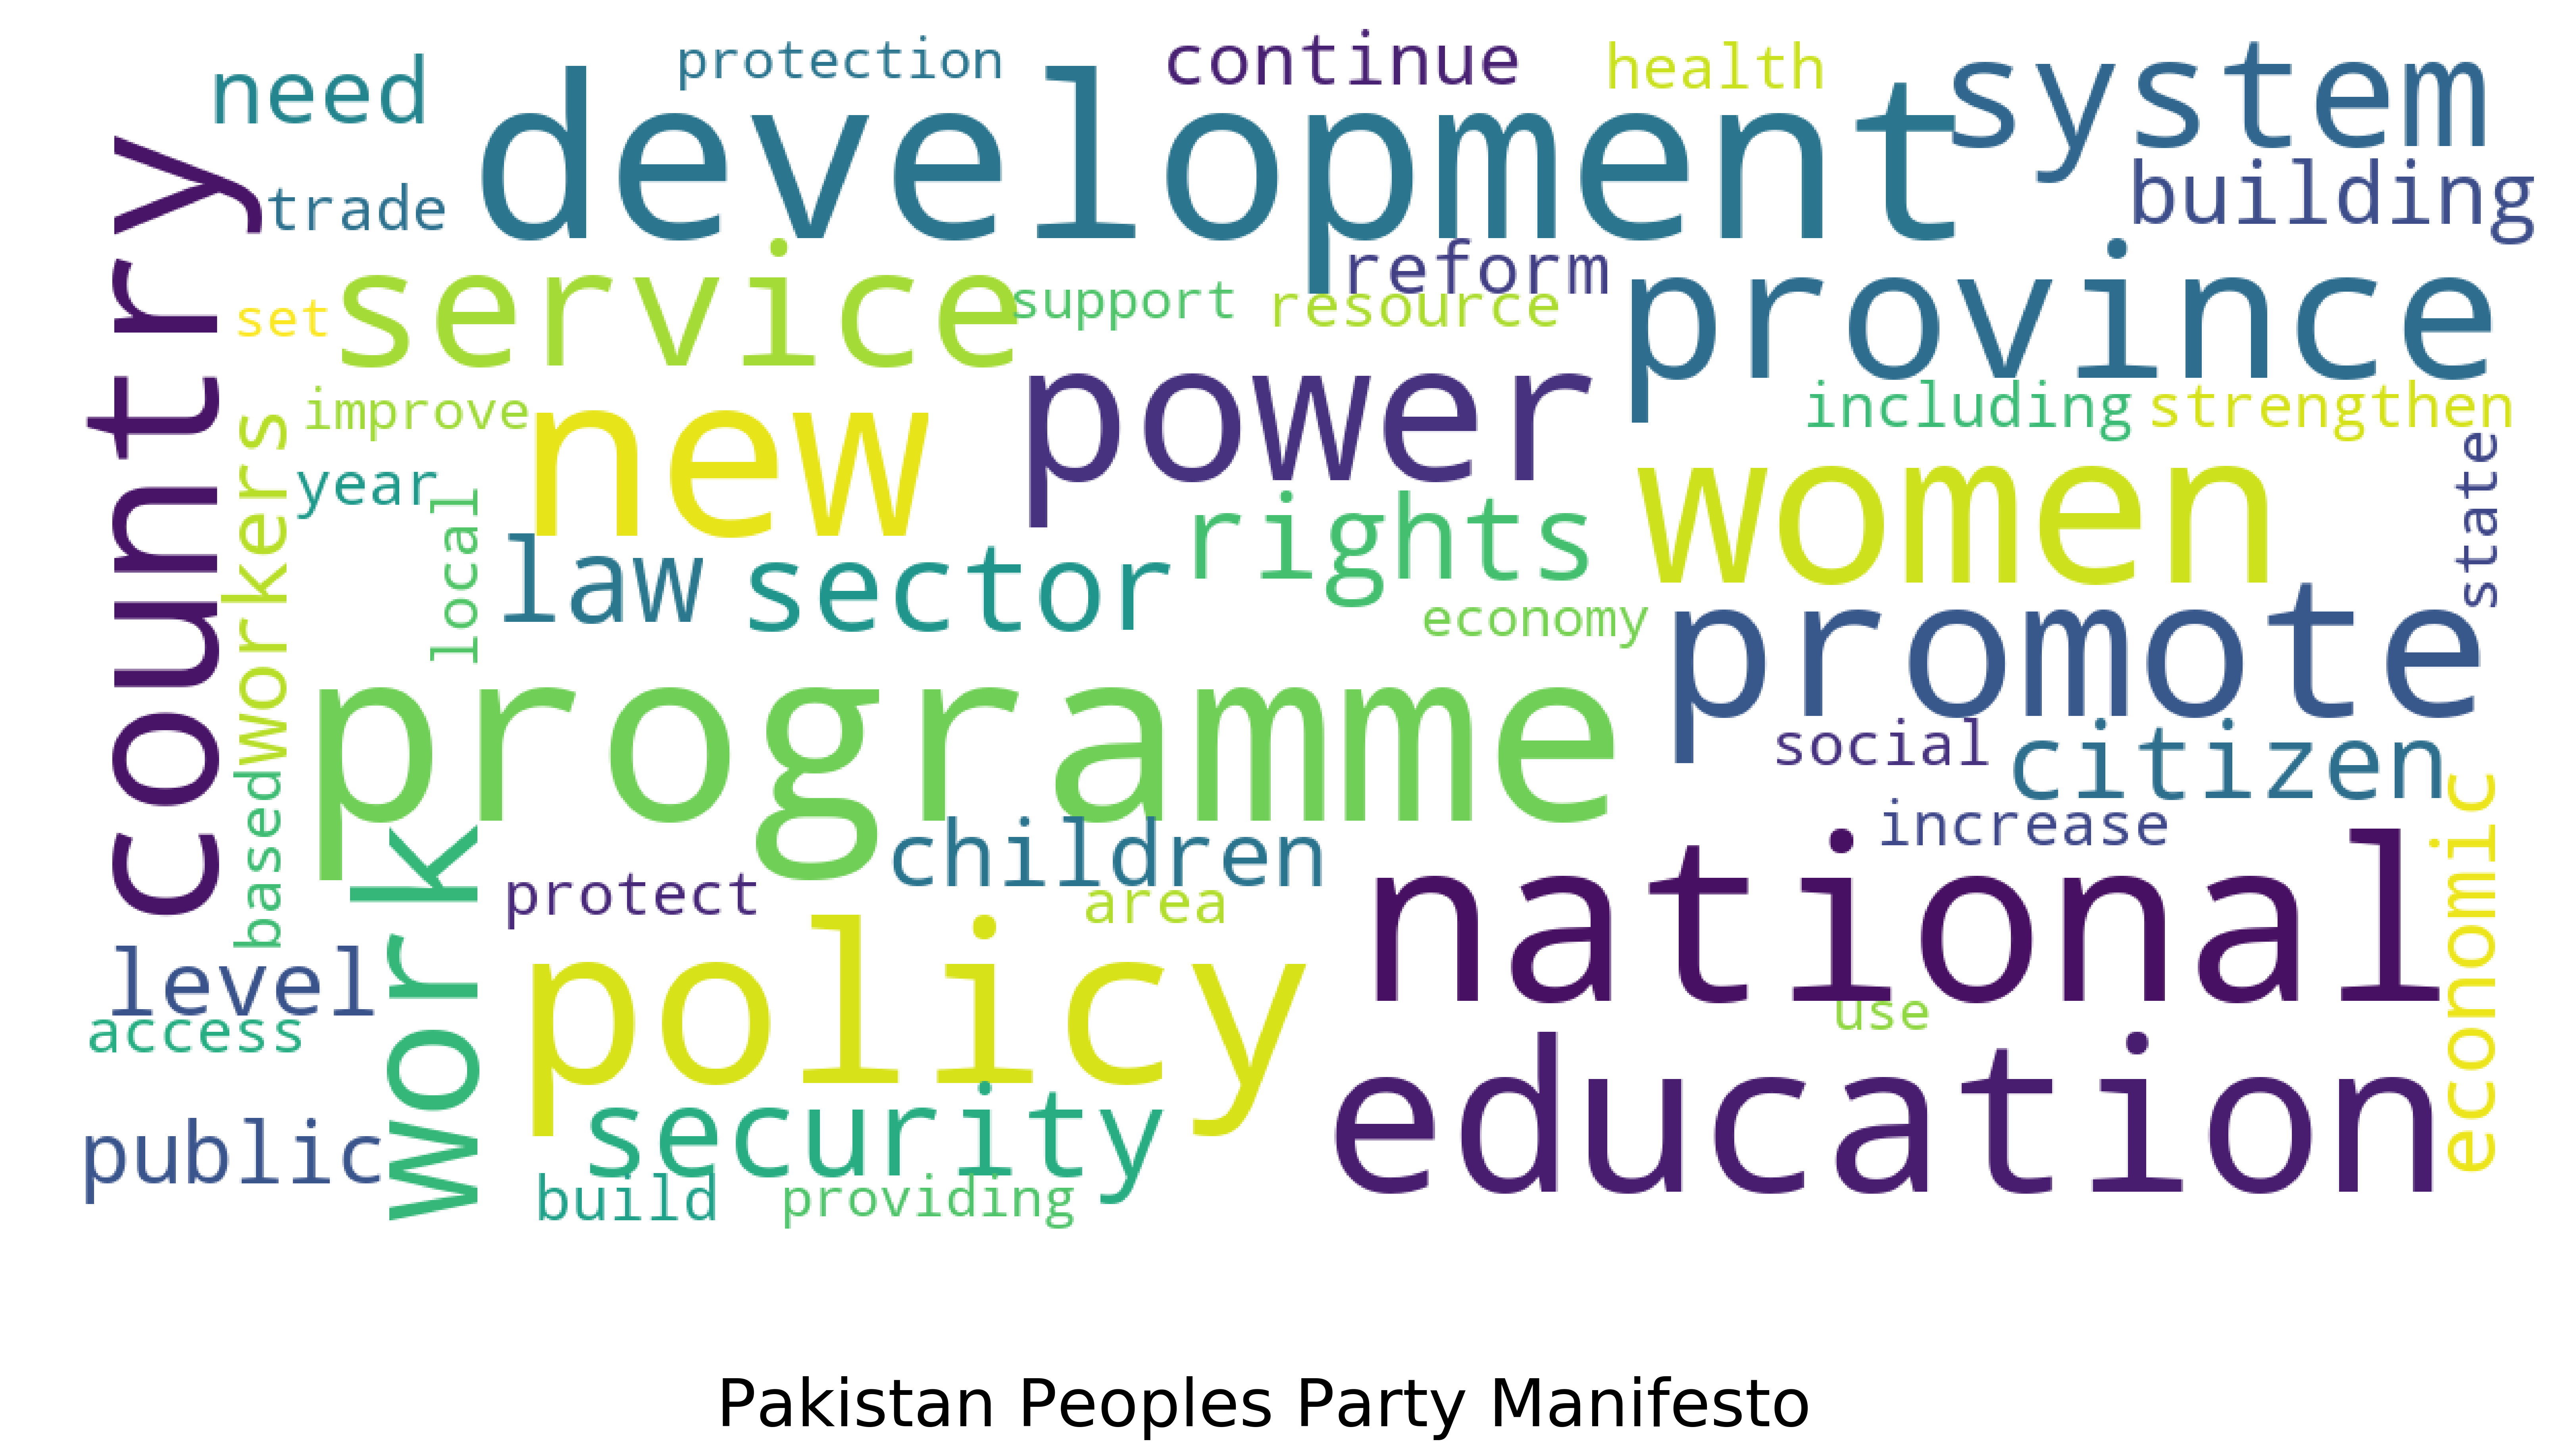

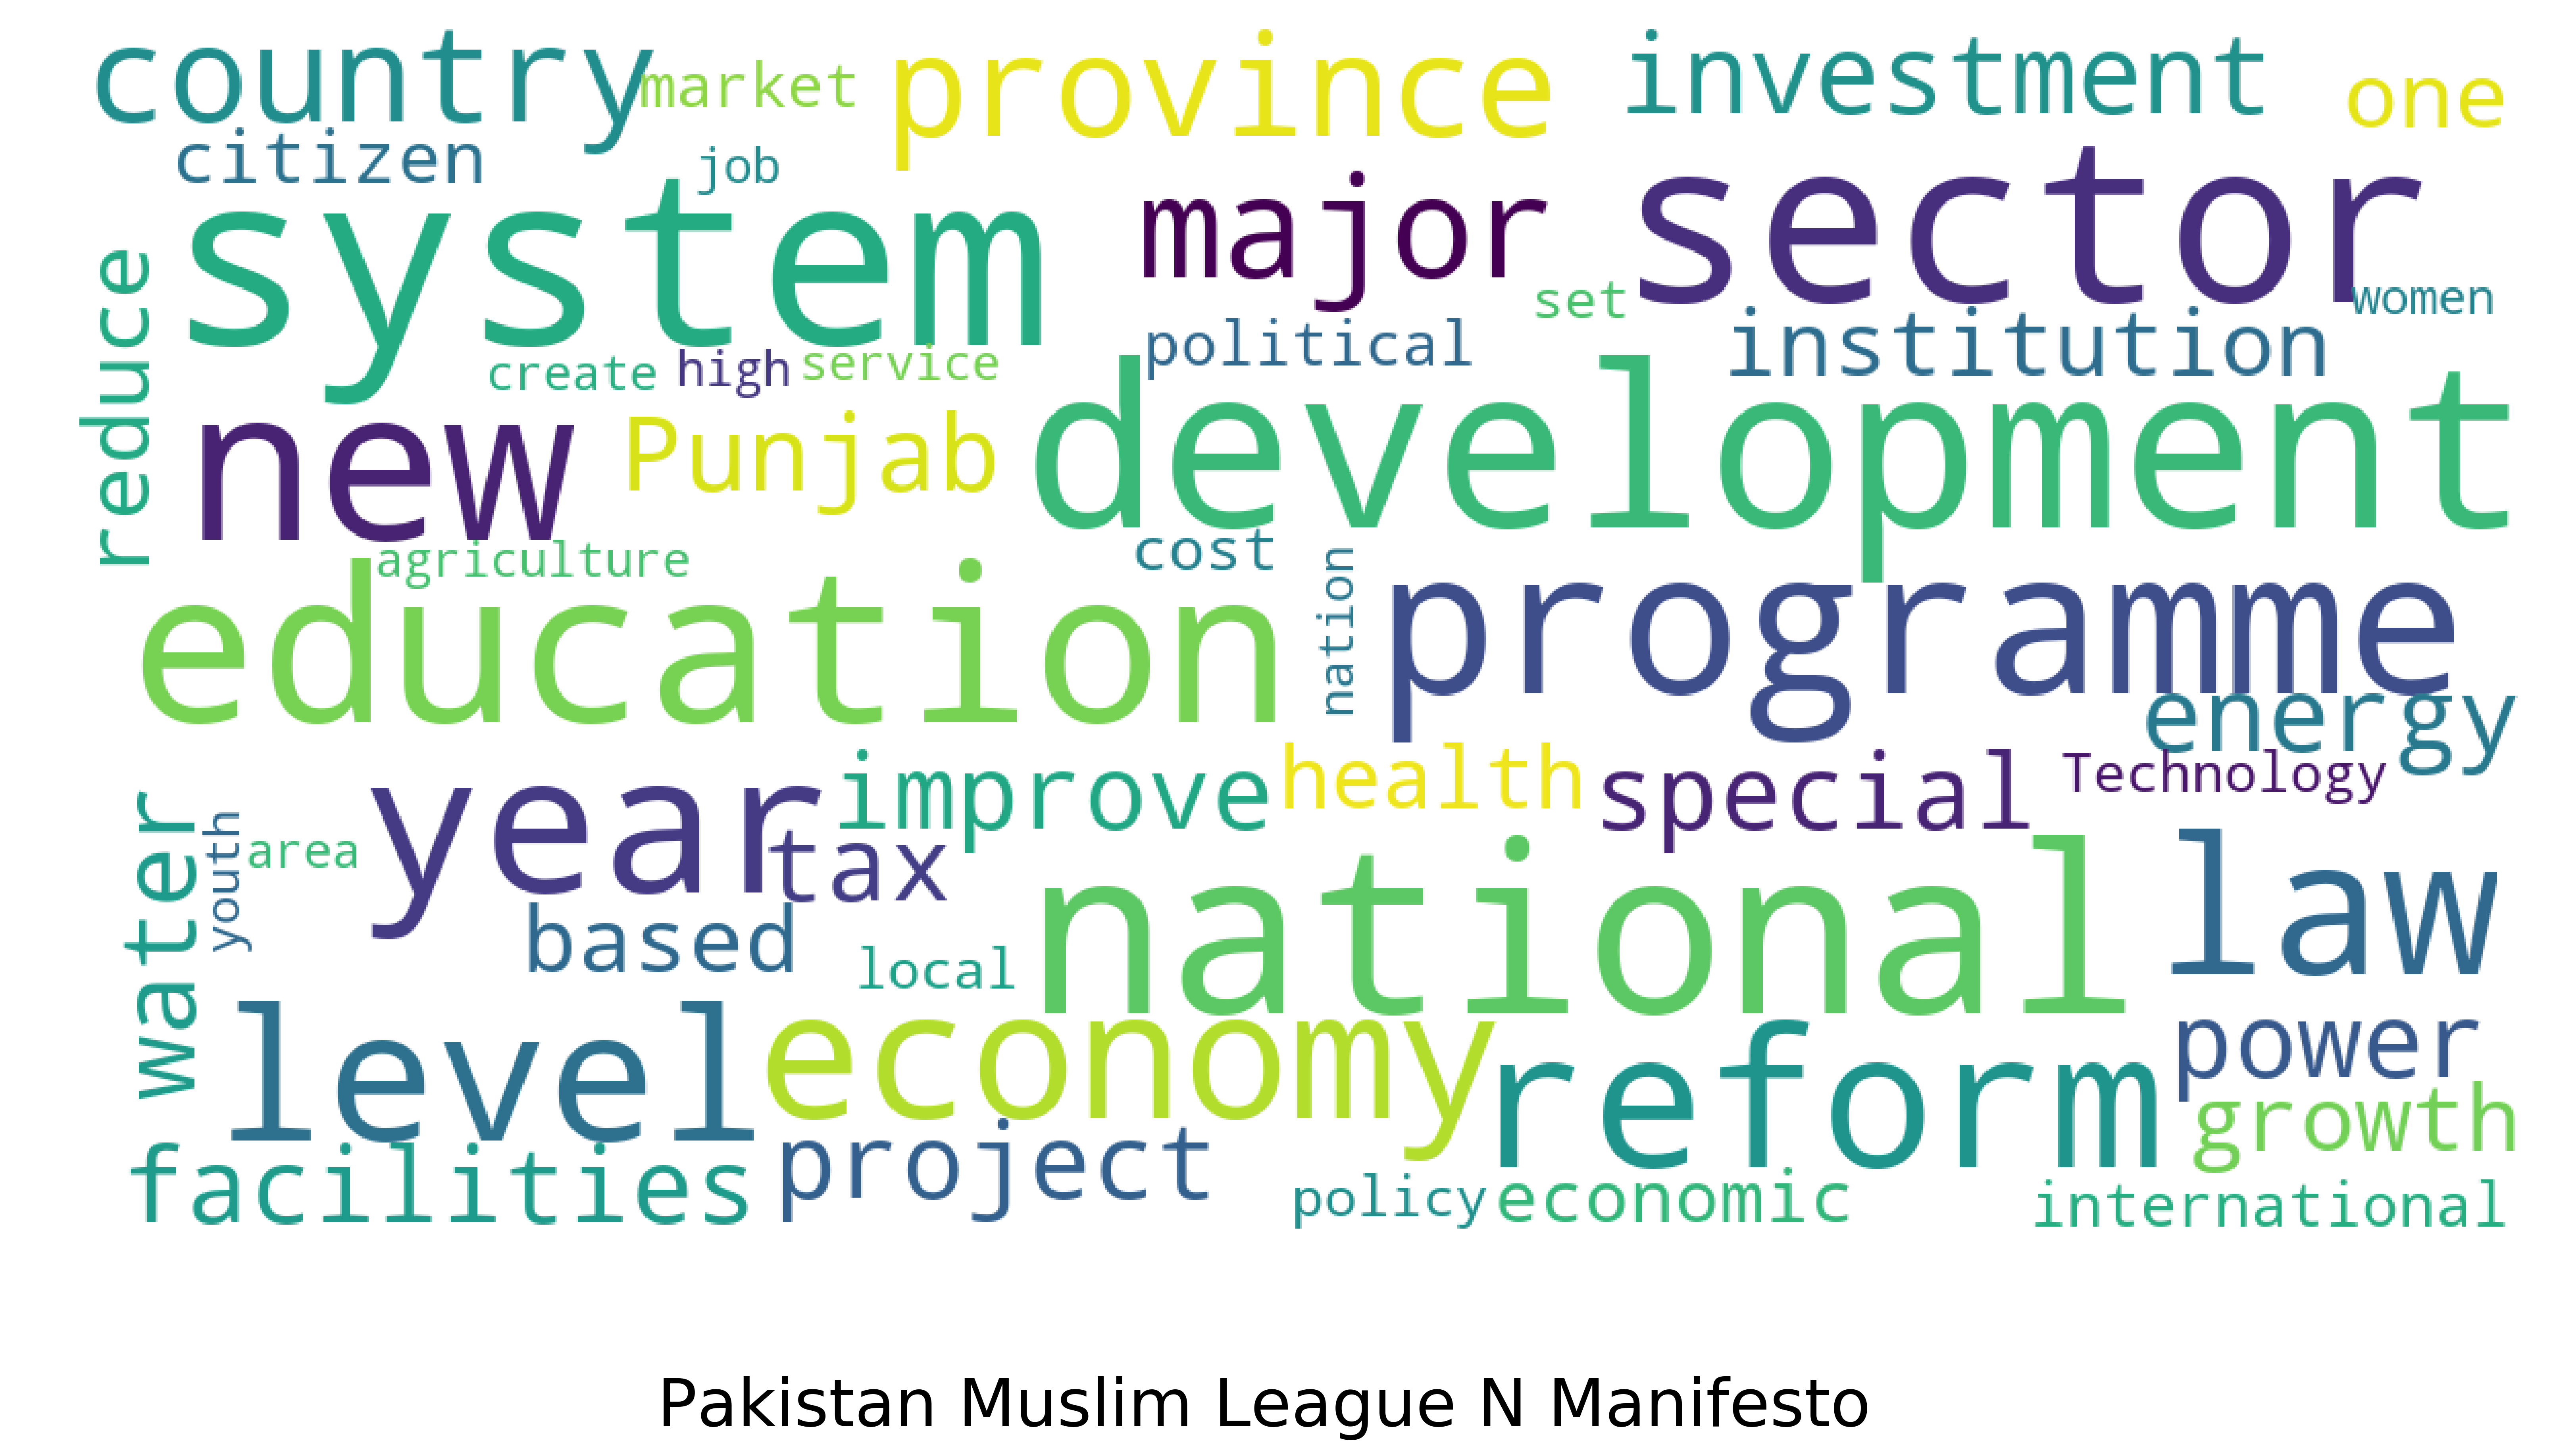

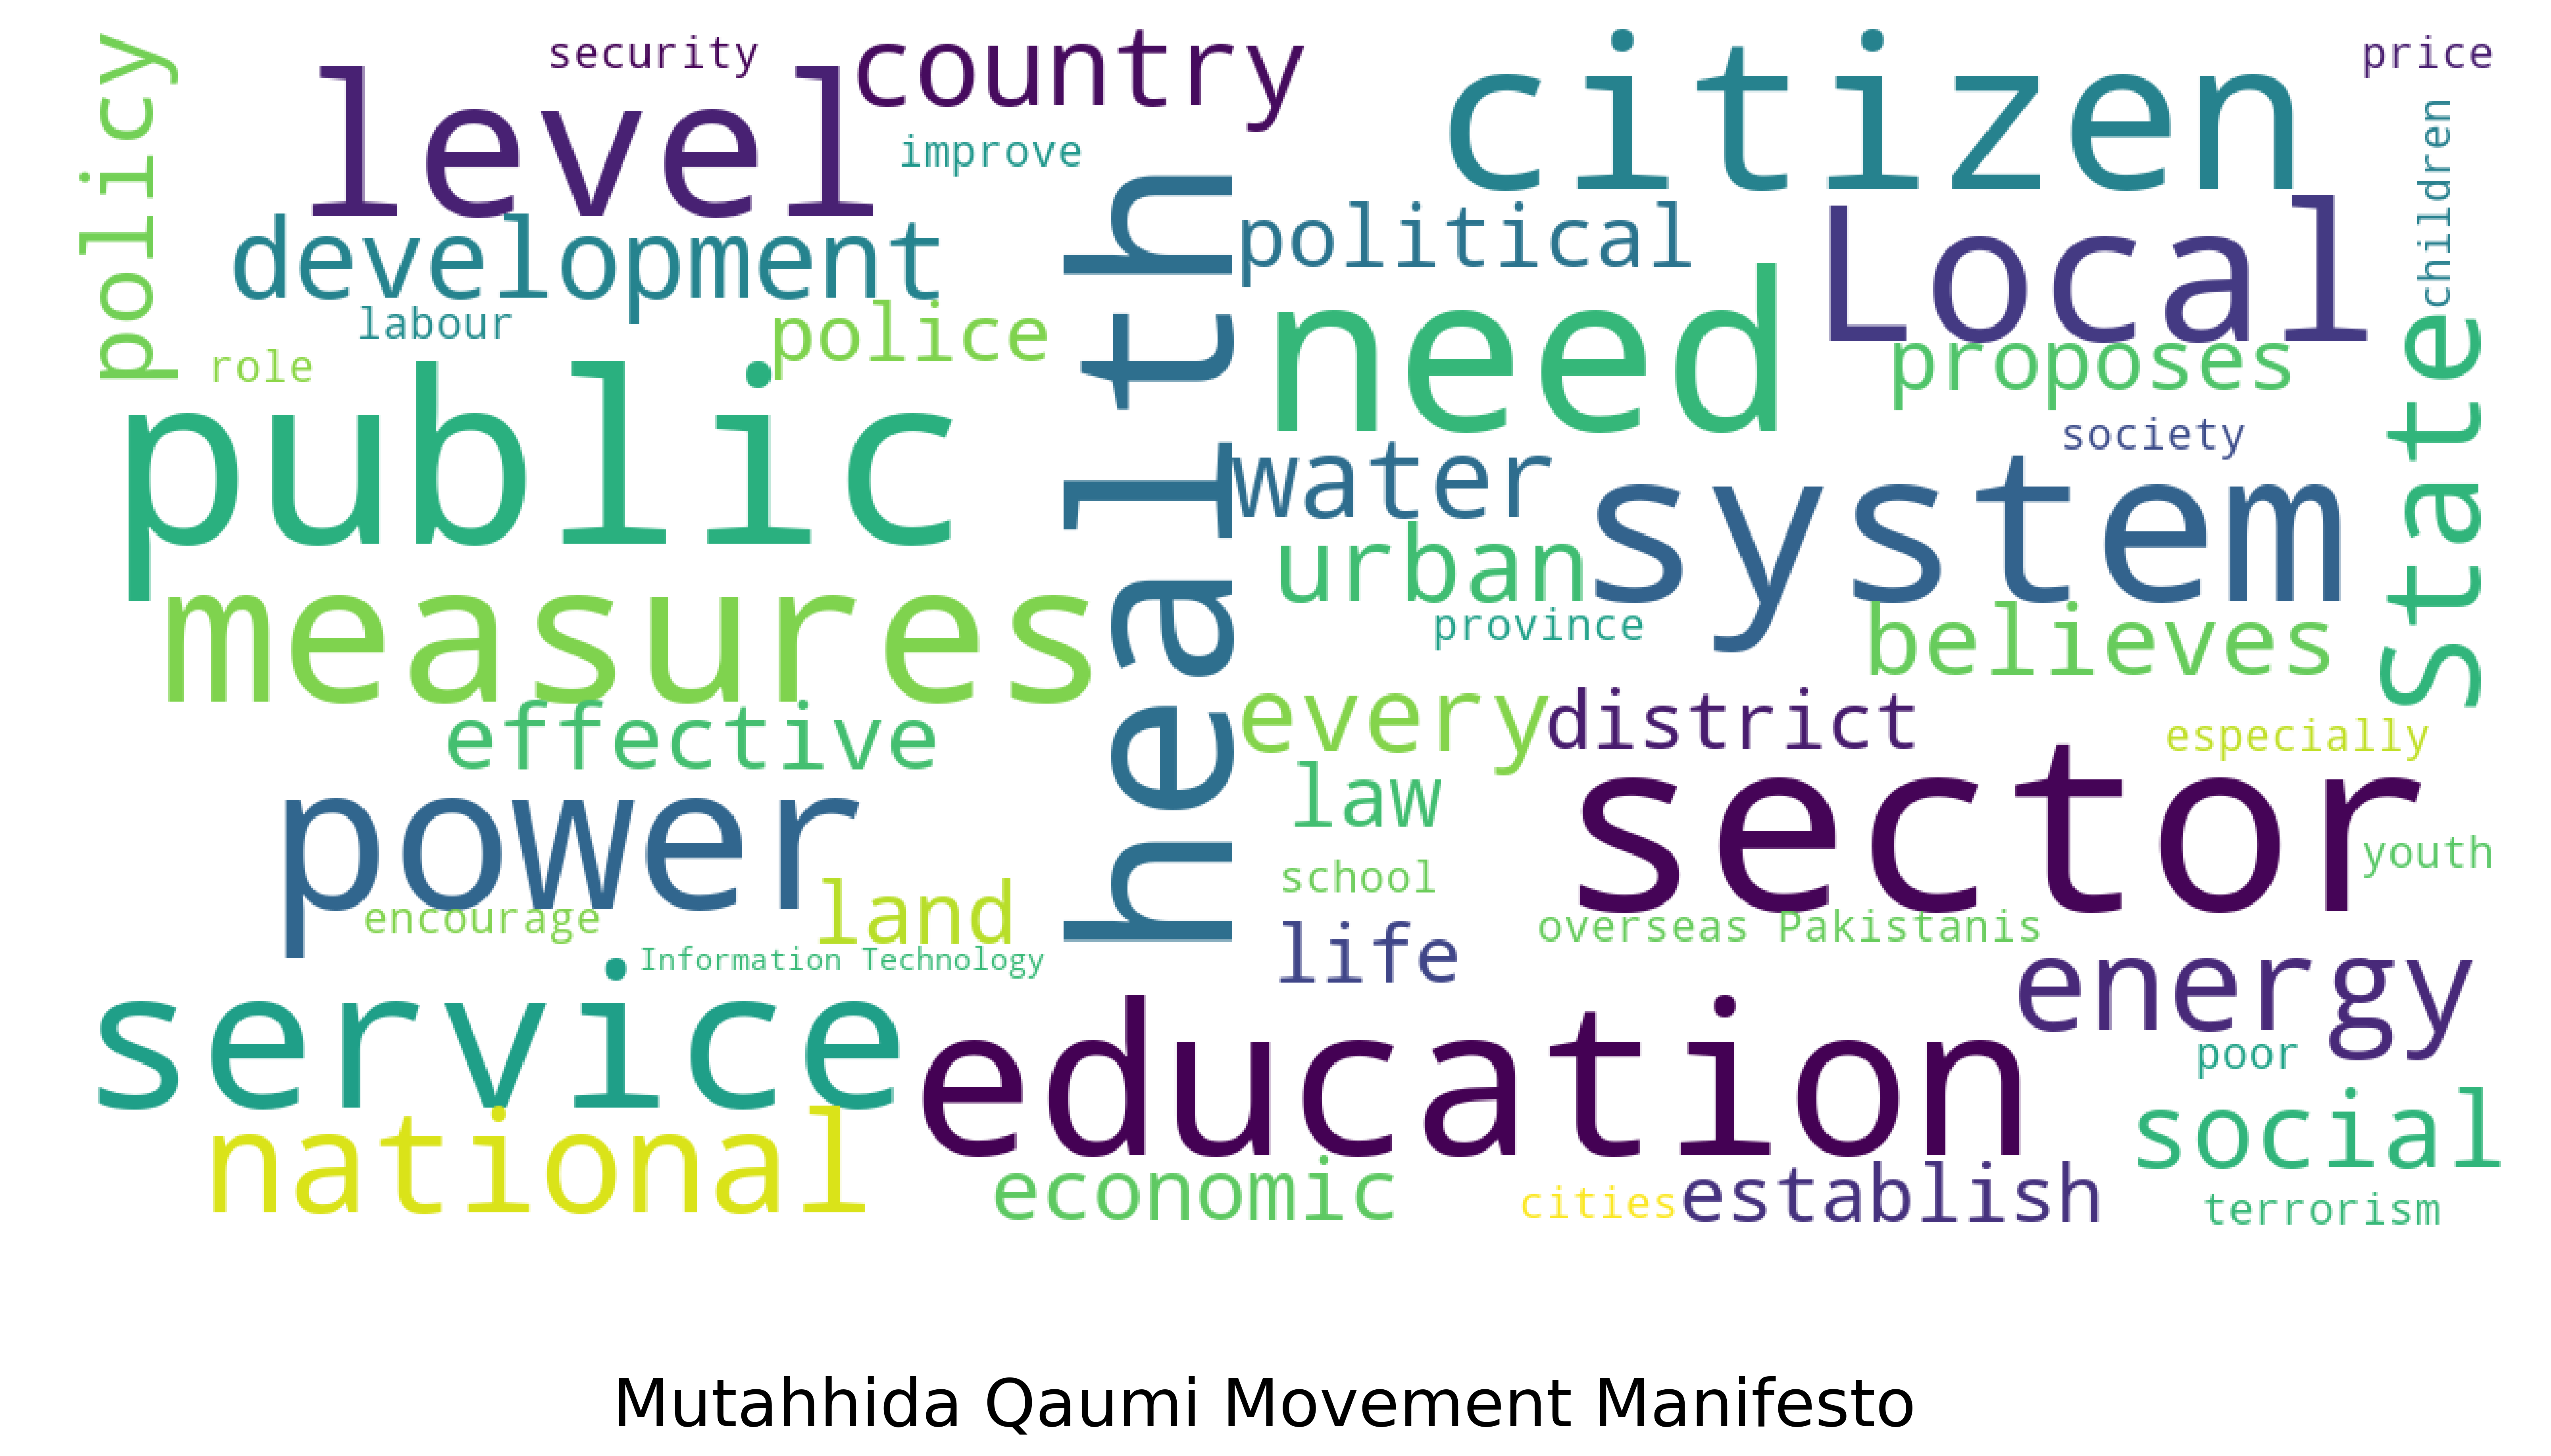

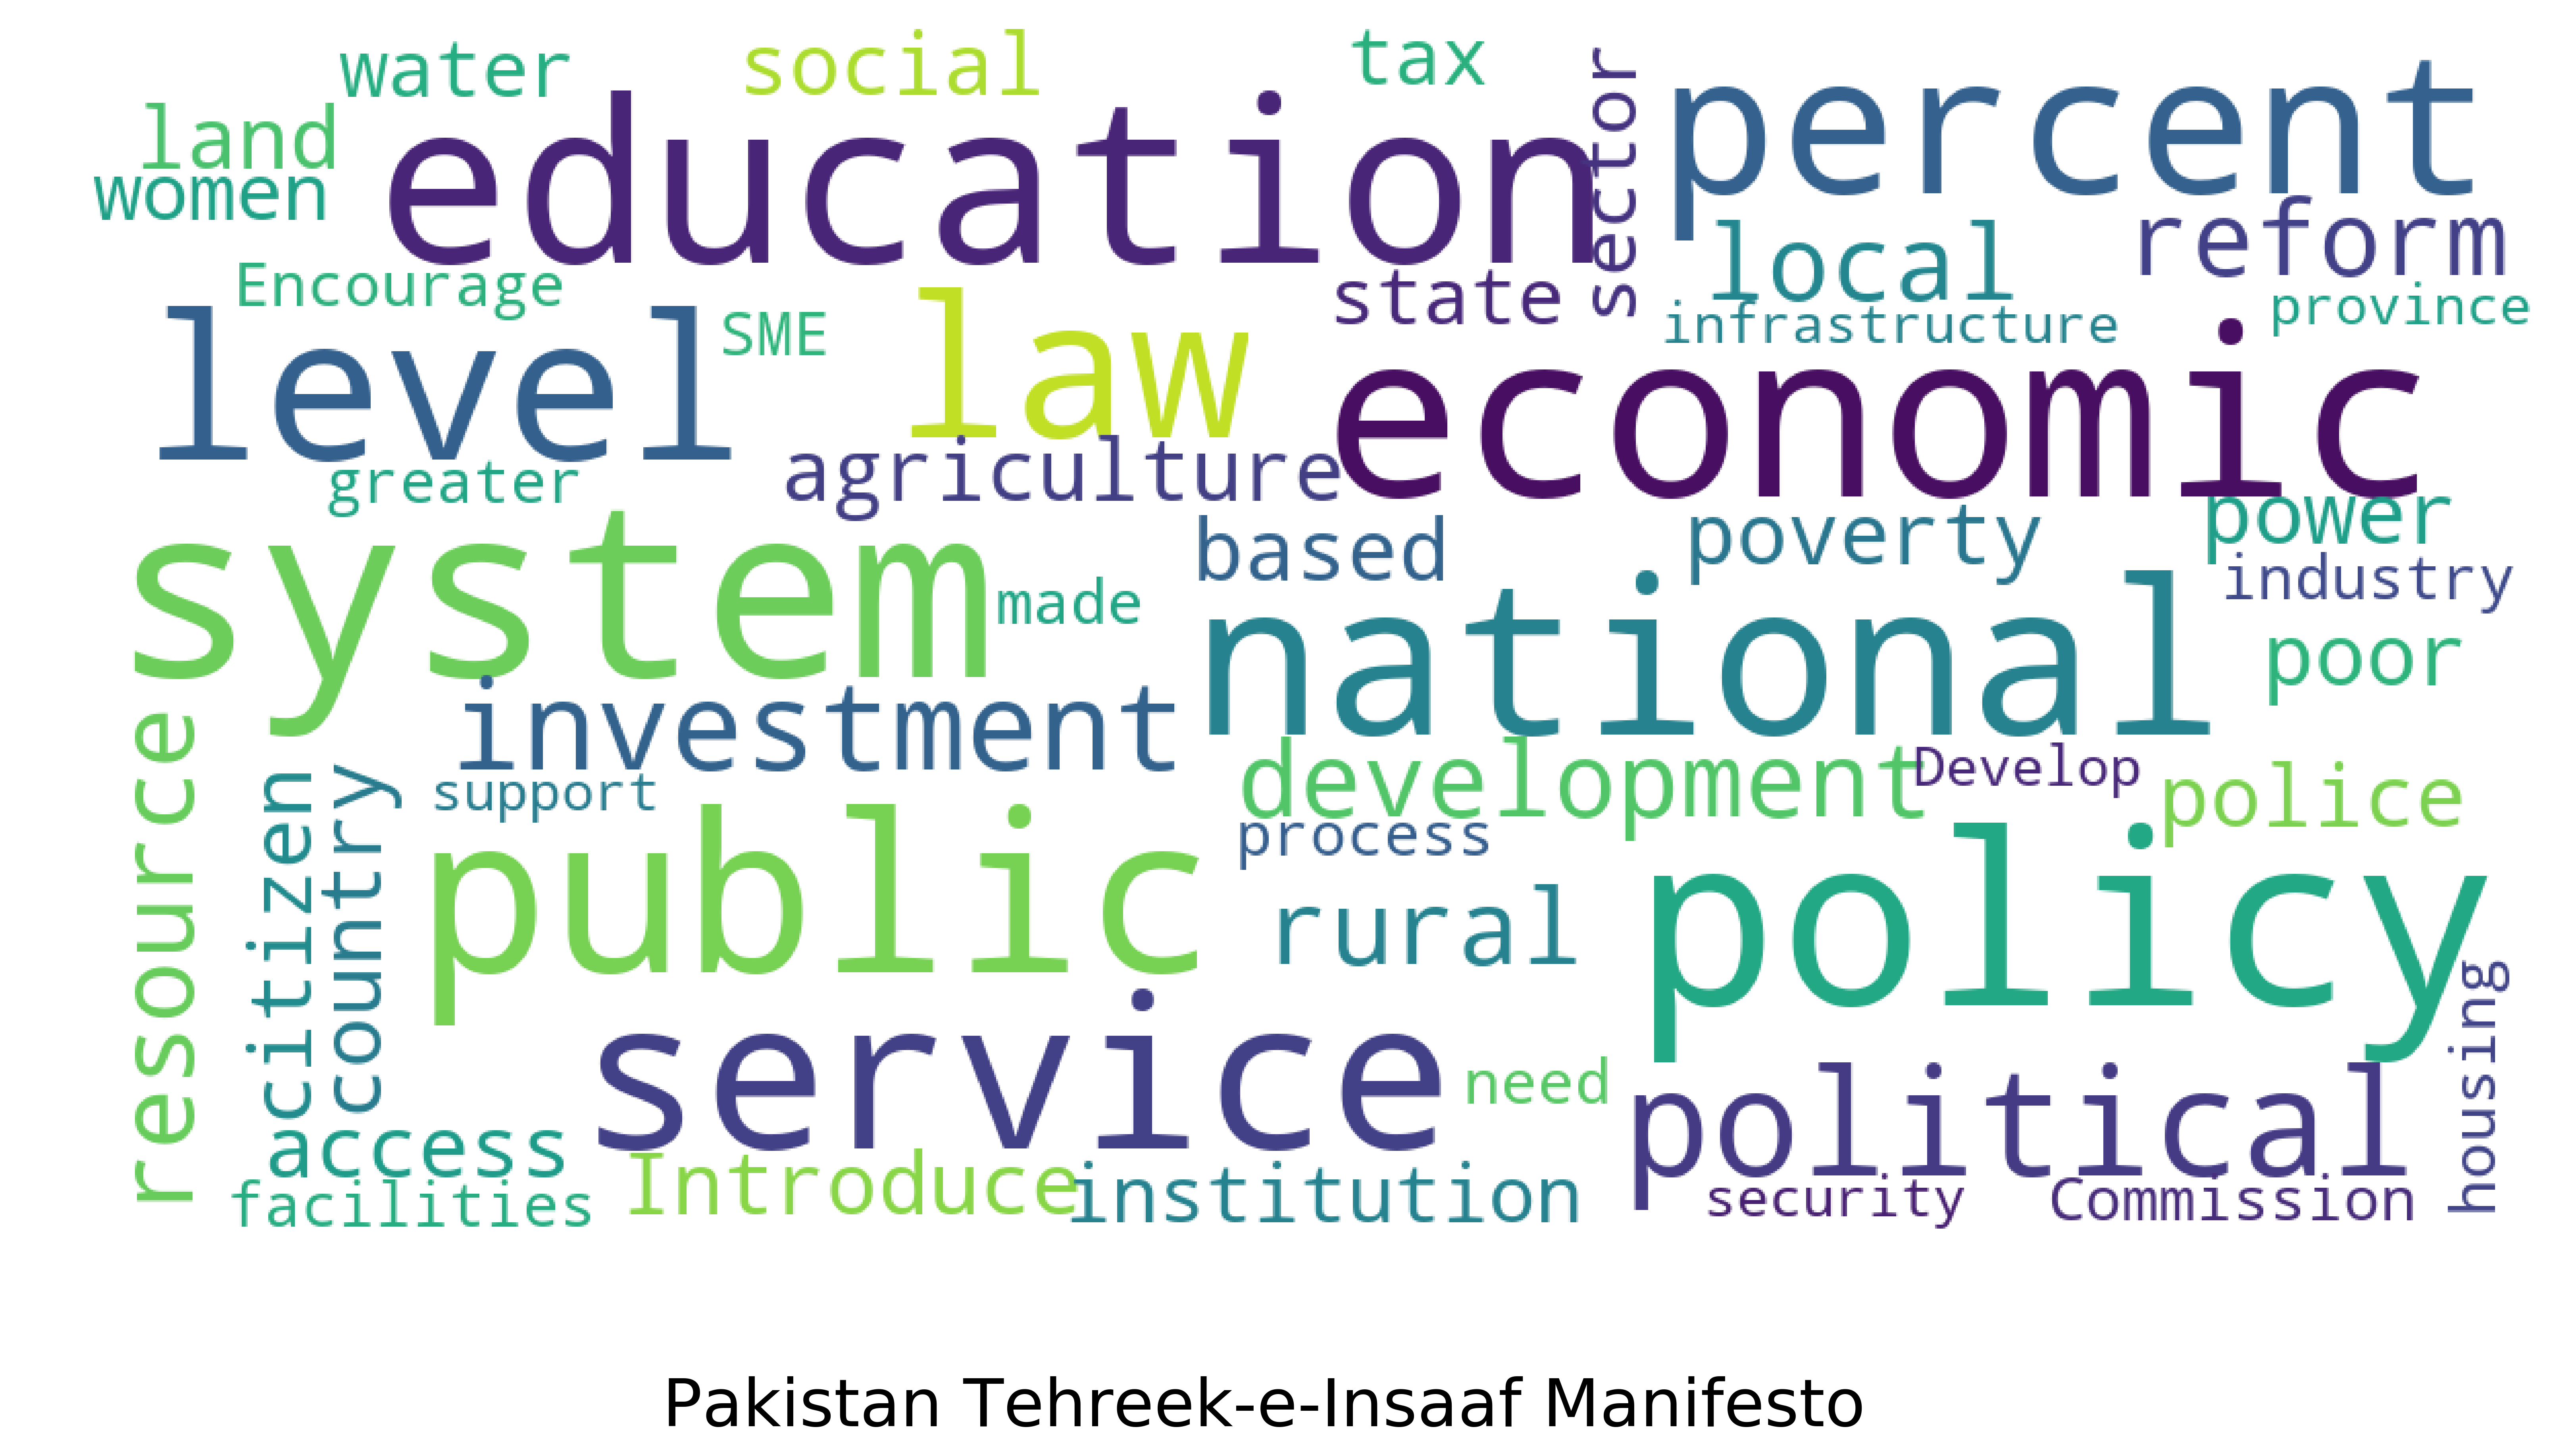

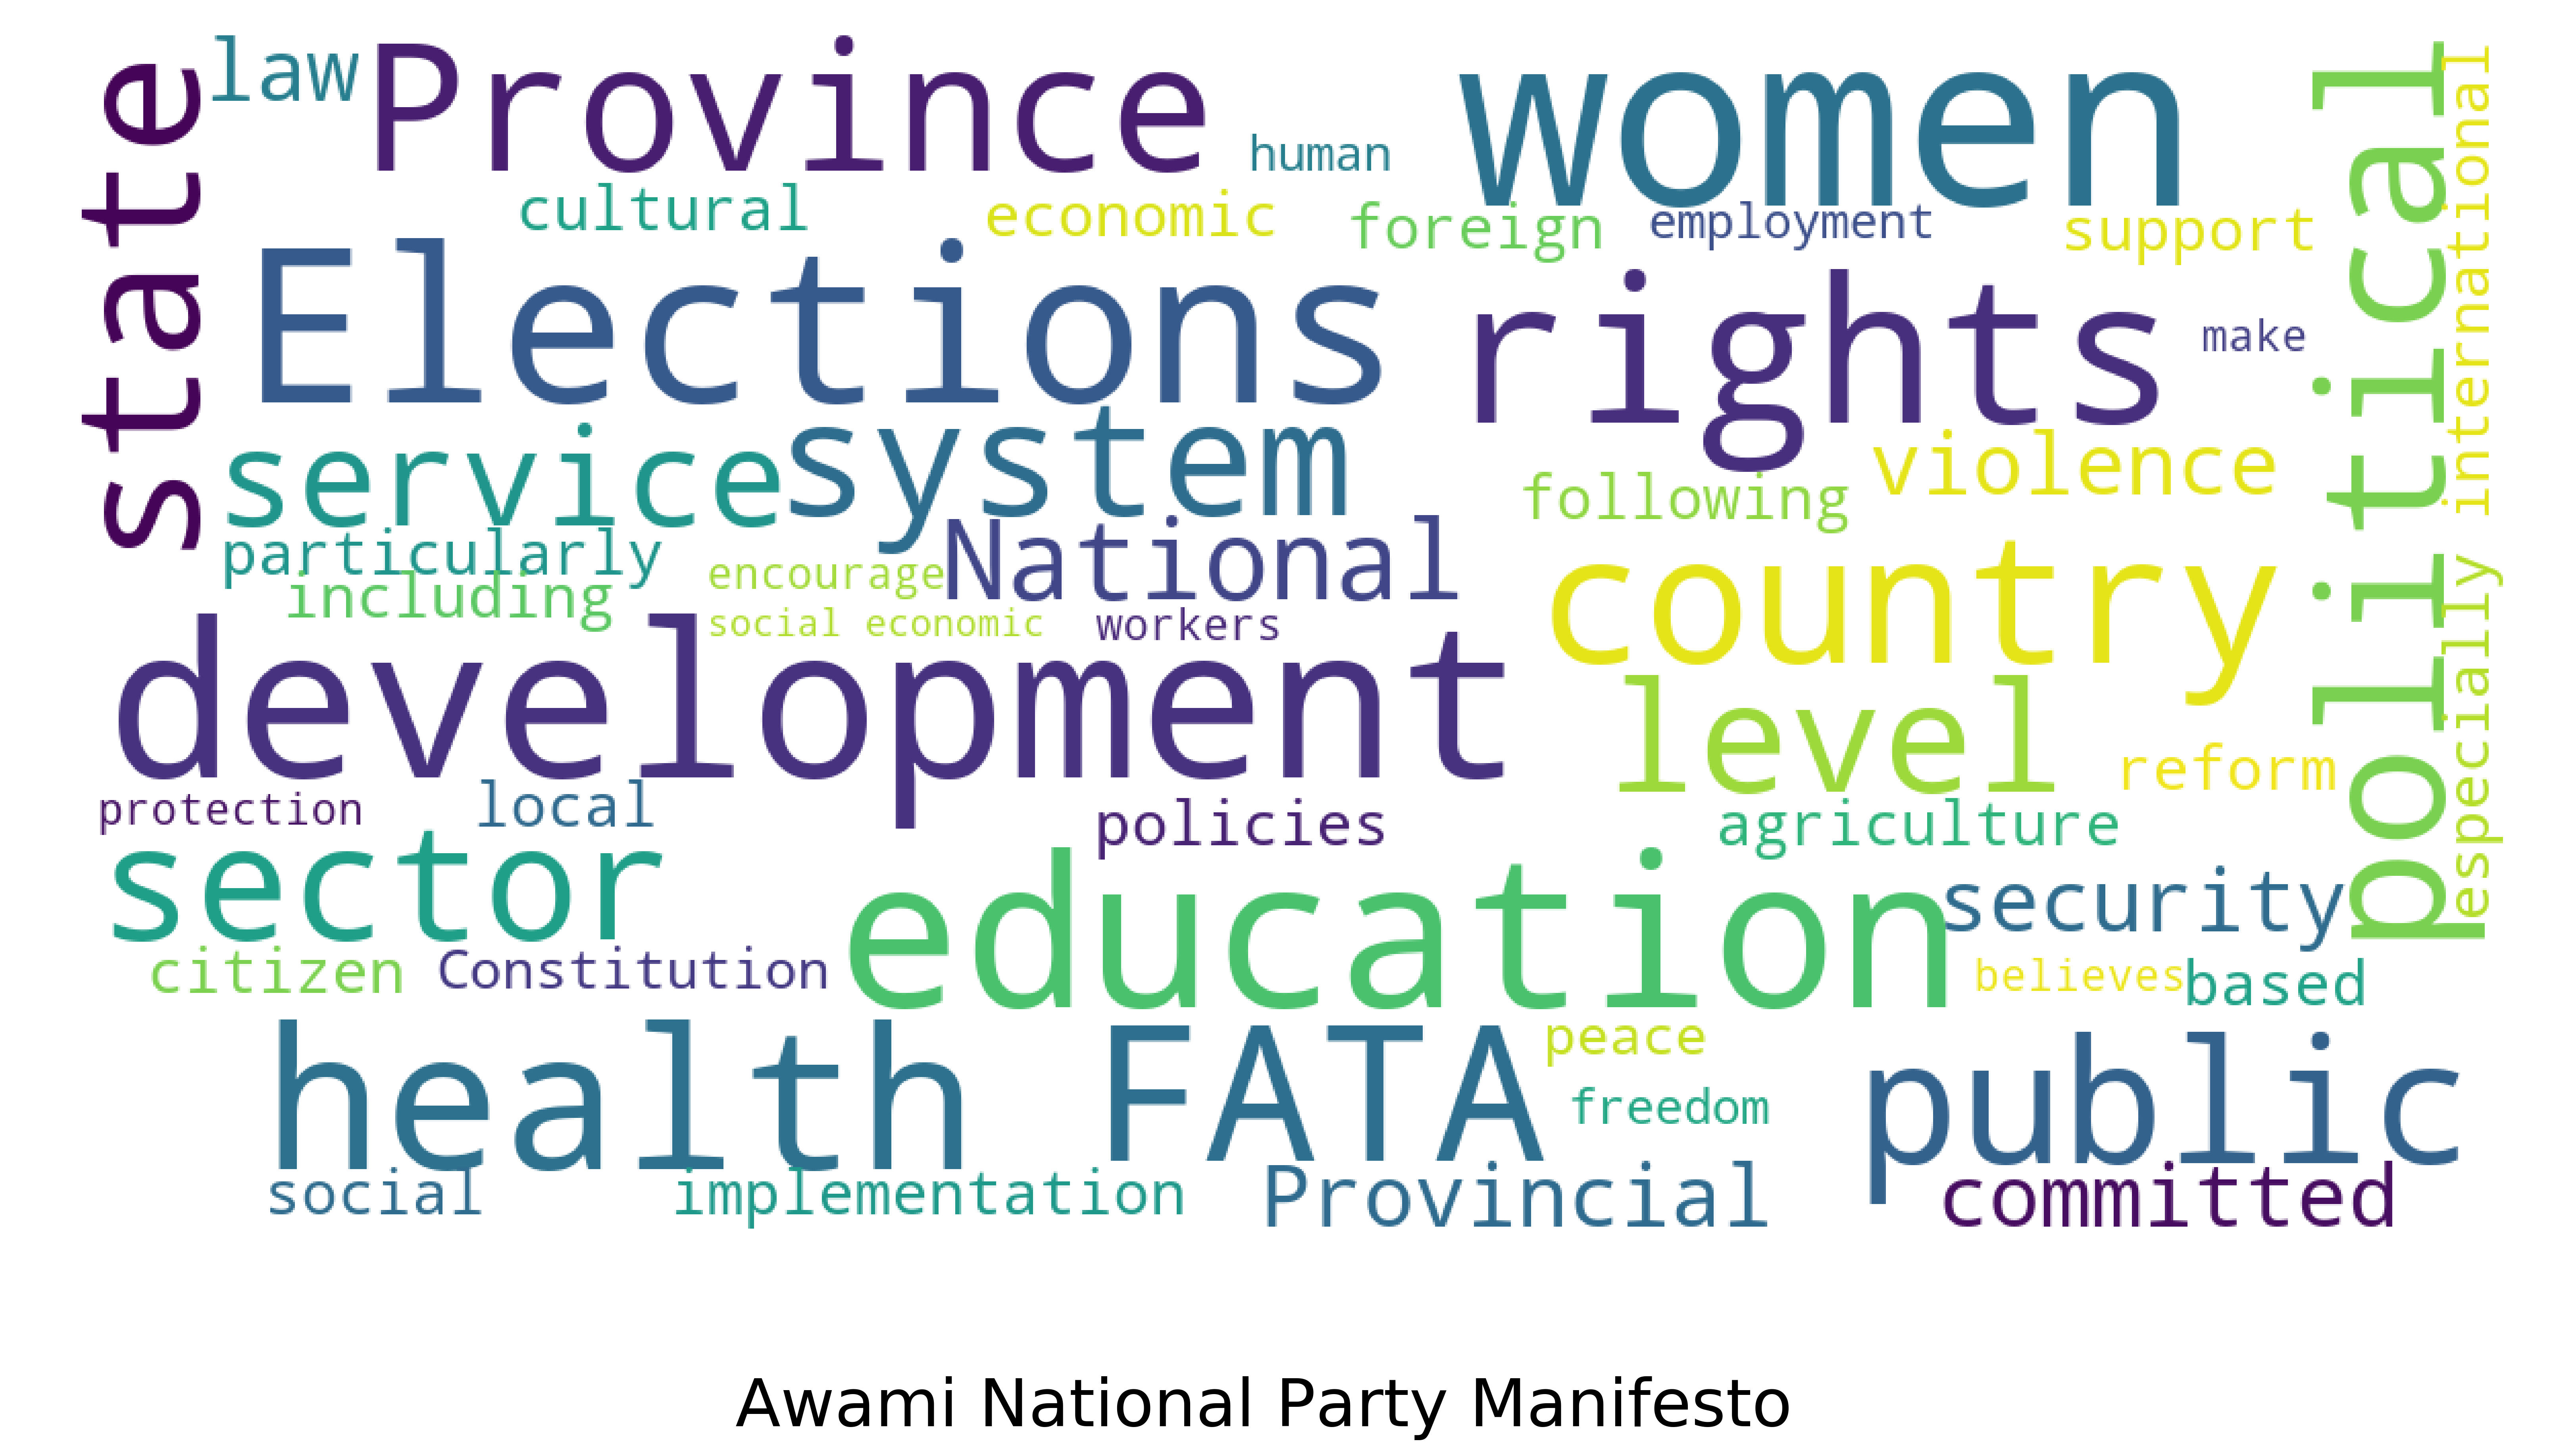

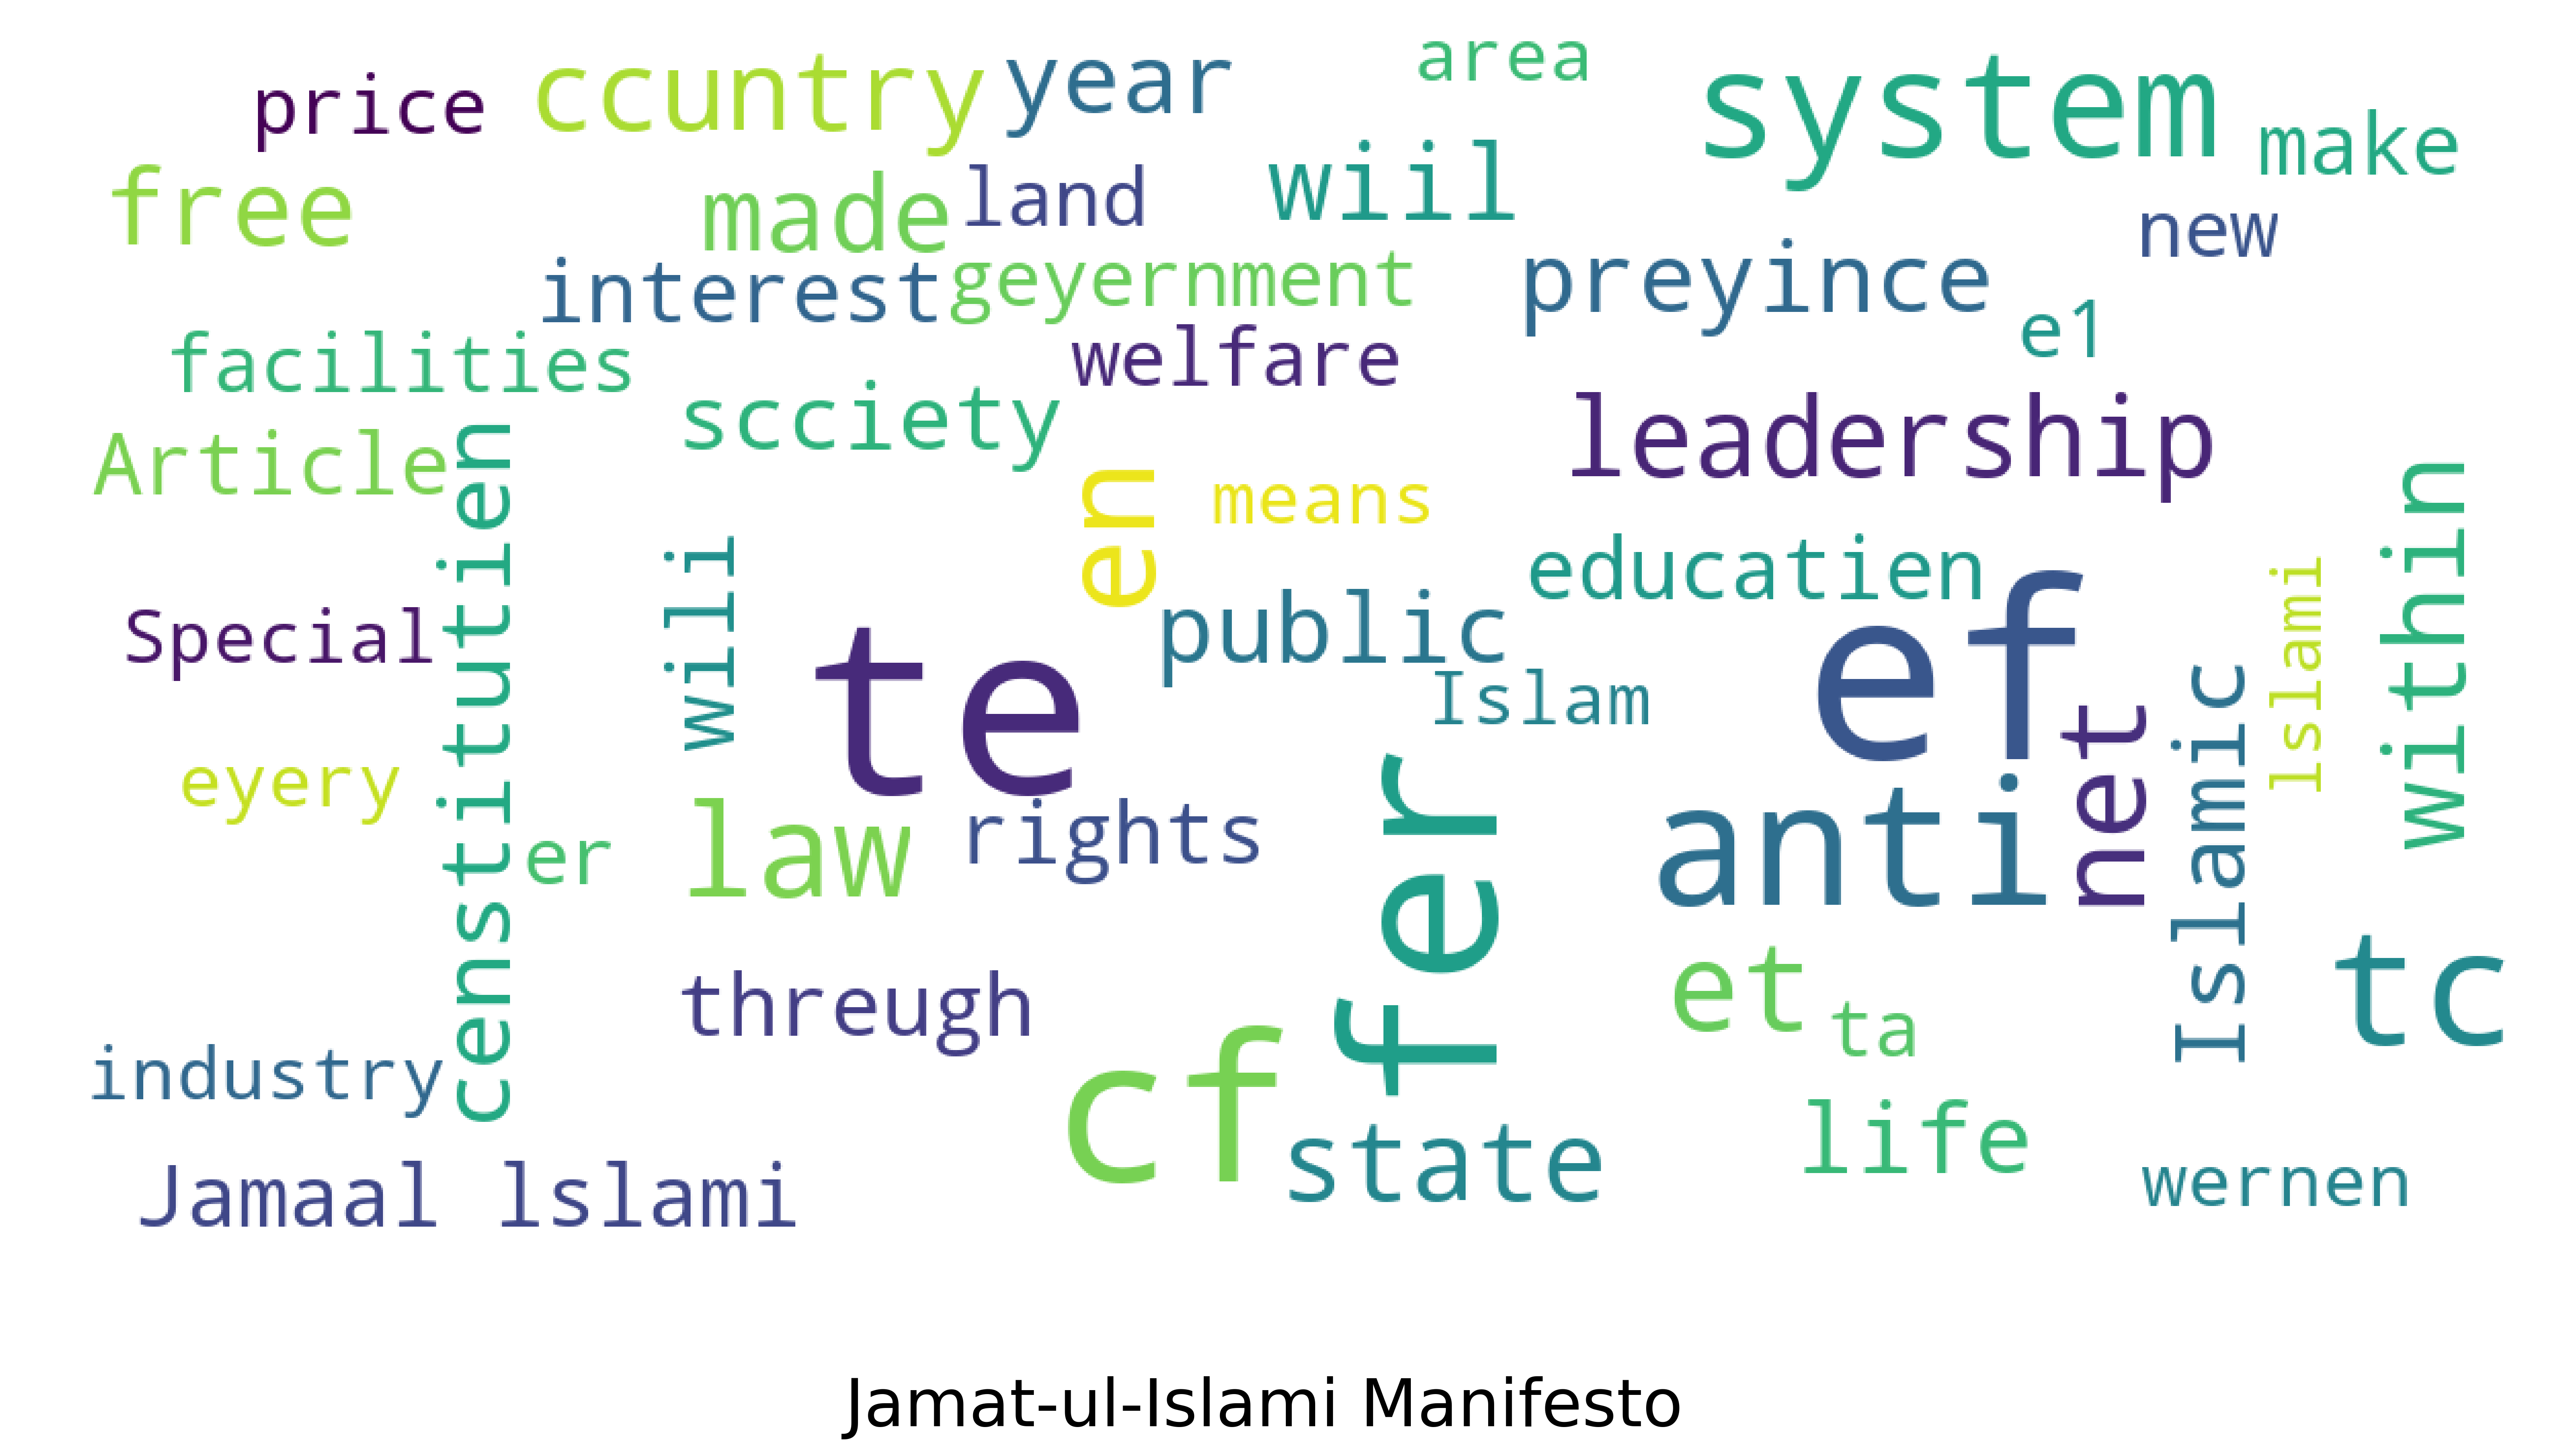

In [19]:
# Creates Word Clouds for each political party manifesto, displaying the top 50 most frequent words by size

for party in list_of_parties:
    create_wordcloud(party.text, title = party.name + ' Manifesto', maximum_words = 50)
    print ( '\n \n \n' )

The first very clear observation was that the WordCloud for Pakistan Peoples Party's (PPP) Manifesto  mirrored their motto of 'Food, Clothing, Shelter' with words such as education, health, economy, workers etc. most common. It also highlighted policies that the PPP had been in favor of during its previous tenure.

The Pakistan Muslim League N (PMLN) portrays itself as the 'business and agriculture friendly' party, and evidence of that could be seen in its high frequency usage of terms such as investment, technology, energy, water, agriculture, tax, market etc.

The Mutahhida Qaumi Movement is more of a city based party rather than a national party, and it was interesting to see how the WordCloud reflected that, with words such as local and district being used. Considering the security situation of the city where its vote bank is mainly from, it also highlighted key words such as urban, law, power, security, police etc.

The most interesting observation was that for all the parties, despite their different political leanings and different vote banks, they all mentioned the same key points such as economy, education, health, women rights etc. However, while all of them menntioned such things, they do have different views on them, especially in the case of the hard right conservative parties such as the Jamaat-ul-Islami. This nuance may have been lost in this Word Cloud analysis.

### SIMILARITY MEASURE

Since the above Word Clouds only displayed the top 50 words on each manifesto, it did not give an accuracte depiction of how similar the entire manifestos are to each other. To explore that, I did the following:

In [226]:
manifesto_similarities()

PARTY 1                        PARTY 2                        SIMILARITY SCORES

Pakistan Peoples Party         Pakistan Peoples Party         1.0
Pakistan Peoples Party         Pakistan Muslim League N       0.99367
Pakistan Peoples Party         Mutahhida Qaumi Movement       0.99199
Pakistan Peoples Party         Pakistan Tehreek-e-Insaaf      0.99
Pakistan Peoples Party         Awami National Party           0.9657
Pakistan Peoples Party         Jamat-ul-Islami                0.94222

Pakistan Muslim League N       Pakistan Peoples Party         0.99367
Pakistan Muslim League N       Pakistan Muslim League N       1.0
Pakistan Muslim League N       Mutahhida Qaumi Movement       0.99516
Pakistan Muslim League N       Pakistan Tehreek-e-Insaaf      0.98727
Pakistan Muslim League N       Awami National Party           0.96907
Pakistan Muslim League N       Jamat-ul-Islami                0.95021

Mutahhida Qaumi Movement       Pakistan Peoples Party         0.99199
Mutahhida Qaumi Mov

The scores indicate how similar two manifestos are, with 1.0 being the highest, and 0.0 being the lowest. Naturally, a manifesto is completely similar to itself, hence explaining the 1.0s in the similarity score column.

The most intriguing thing to notice is that the three parties which were top 3 in the 2013 elections (PMLN, PPP and PTI) have over a 98% match in their manifestos. Not only that, the other parties also have manifestos that are above 95% similar. The only exception being the JI manifesto, however that could be attributed to the initial source errors in the text, which were mentioned at the start. If we are to take manifestos at face values as the main decider for the Pakistani electorate (which is not necessarily, or even remotely true), then that serves as support for the 'Median Voter Theorem' which, in this context, has implications that parties will try to allign themselves to be most preferable to the median voter. Clearly, in this case, all the parties have tried to allign their manifestos to a similar 'common' point to appease to the highest number of voters. 

### SENTIMENT ANALYSIS

Lastly, I wanted to explore the degree to which a manifesto - and its content - might influence the emotional state of the reader, as the reader went through reading it from start to finish. Essentially, I wanted to assess the sentiment of the manifesto being read. Rather than treating the whole text as a cluster, I analyzed each sentence of a manifesto from front page to back page. 
I used two metrics of sentiment for this:
- Polarity (with 1.0 symbolizing a highly positive polarity, and -1.0 symbolyzing highly negative polarity). The idea here being that sentences of high positive polarity would evoke positive sentiment, and those with low polarity evoking negative sentiment. Polarity of 0.0 would be neutral territory, and not evoke much sentiments from the reader.
- Subjectivity (with 1.0 indicating the sentence is extremely subjective, and 0.0 indicating an objective sentence). More hopeful and optimistic manifestos would probably end with high subjectivity scores rather than matter of fact, unemotional and objective statements.


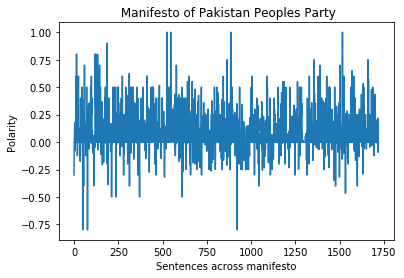

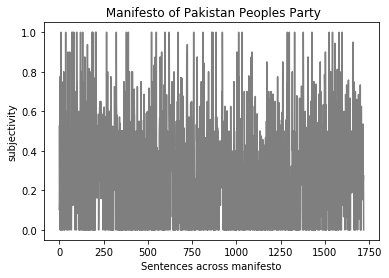

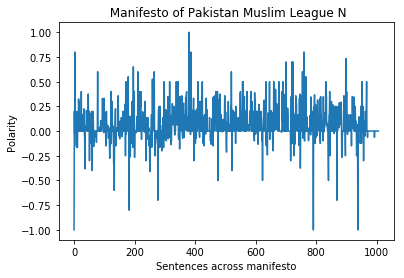

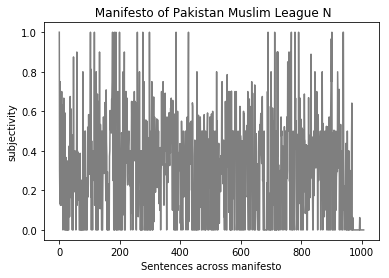

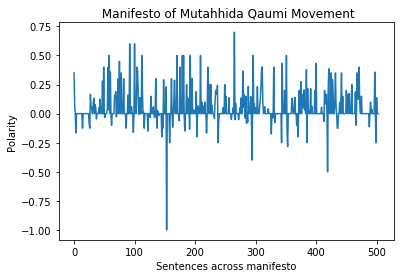

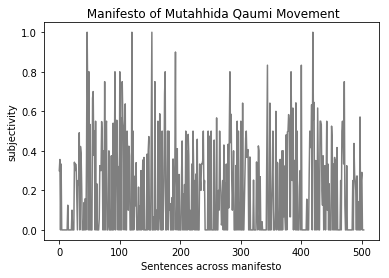

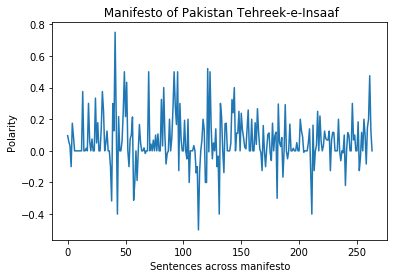

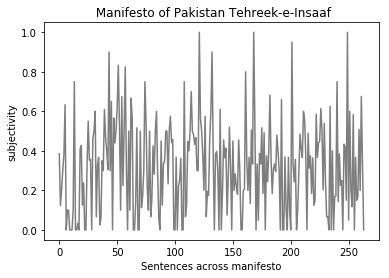

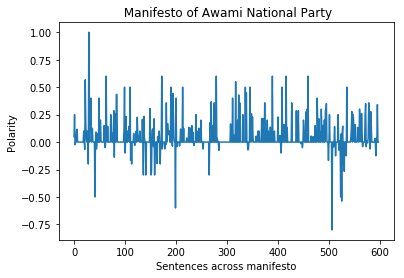

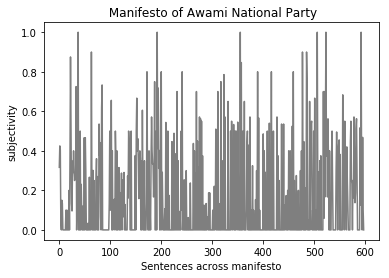

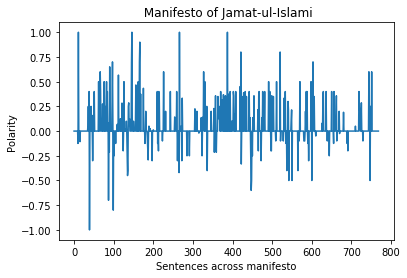

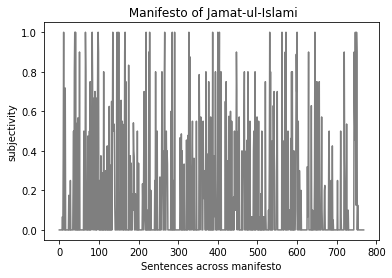

In [172]:
# Shows polarity and subjectivity of each manifesto from first sentence to last sentence
for party in list_of_parties:
    sentiment_analysis (party.sentence_tokens, party.name)

Certain key things to notice here are:
- Polarity
    - The number of sentences each party had which evoked positive versus negative sentiment. 
    - The degree to which the sentences were positive or negative i.e. the polarity number.
    - The variation in polarity across the manifesto
- Subjectivity
    - How subjective or objective each statement is
    - The variation in subjectivity across the manifesto


All of the manifestos generally had high positive polarity, indicating they were stating positive things. What was also interesting to see was that negative statements were said in contiguous chunks, indicating passages where negative things were said about the status quo or about other parties. 

Interestingly, the PPP, which was the incumbent government at the time of the 2013 elections, had the highest proportion of negative polarity statements. Almost all of its statements were subjective. The PPP also had a consistent pattern in its manifesto, with trends of positive polarity chunks followed by negative polarity chunks.
The PMLN, while maintaining positive polarity for the most part, had some statements with extremely high negative polarity. It also maintained an equal number of subjective and objective claims, though most statements were half way in between.

The MQM very rarely ventured towards negative polarity territory, sticking to positive statements throughout. There was however significant variation in how objective it was in each of its sentences.
The PTI while staying positive, did not evoke many strong responses, sticking mostly to neutral statements. Most of its statements were also objective. This might be indicative that they mostly stuck to facts and policy statements in their manifesto. 

The ANP portrayed a mixed emotional ride in their manifesto, with an introductory 'doom and gloom' scenario where their sentences had negative polarity, followed by a significant positive polarity in their middle policy content period. It then again reverted to negative polarity before ending with positive polarity. Since the end is usually where parties try to end on a high note, it's indicative that they mentioned flaws of the status quo or other parties before ending with their own pitch.

### MANIFESTO SUMMARIZATION

For the average Pakistani voter, reading large manifestos might be an arduous and time consuming affair. In most cases, these documents are not read thoroughly. As such, a summary would be quite useful in helping voters understand key party positions and policies. 
The summarize_text function uses 5% of the text in the manifesto for its summary. 

In [215]:
# Prints a summary of each party's manifesto using 5% of the sentences in that manifesto
for party in list_of_parties:
    print (party.name + ' Manifesto Summary')
    print ('\n \n')
    summarize_text (party.text)
    print ('\n \n \n \n \n \n \n ')

Pakistan Peoples Party Manifesto Summary

 

As we shepherd Pakistan into its first constitutional transfer of power through elections, we resolve today that we will continue to make history by using a new elected term in office to take Pakistan into a future based on social justice, peace and prosperity for all.
Our 2008 term was used to preserve and strengthen the federation by building a new social contract for Pakistan and devolving power to the provinces.
We no longer even remind people of the jail terms and the extra-judicial executions this party has faced; today, the PPPP still stands as the most accountable party and government in the history of Pakistan.
privatization, zero investment in energy security and inflation in double digits, that exposed the people to local and international shocks, we brought down inflation to single digits, built up Pakistan’s exports to unprecedented levels, and attracted the highest flow of remittances in Pakistan’s history.
We have seven core p

This is to be achieved by means of socio-economic development, generating opportunities and jobs, based on equity, fairness and justice, on the foundation of democratic principles and above all, of the rule of law.
 Democratic governance which requires supremacy of the constitution and the rule of law in order to reduce corruption, tax evasion, wasteful expenditure, misuse of power, and meets the aspirations of the people.
PML(N) fully understands the gravity of the present global and national economic crises and the enormity of the tasks outlined above, but with clearly defined goals and objectives, strong leadership and highly professional team, PML(N) is determined to bring about fundamental and far reaching reforms and changes in the economic landscape of the country.
PML(N)’s preferred policy will be to develop infrastructure projects through private sector on BOO / BOT (Build Own Operate/Build Operate Transfer) basis.
As far as PSDP is concerned, initially our focus will be on t

Due to this obsolete system a genuine democracy could not establish in the country and the people of Pakistan could not get their due rights, social justice, equal opportunities, rule of law and real participation in the affairs of the state.
MQM is struggling to abolish this obsolete system and introduce participatory democracy, merit based bureaucracy and independent judiciary wherein the State shall promote social and economic wellbeing of the people in order to establish a truly democratic, progressive and egalitarian society in the country where all citizens have equal rights irrespective of their caste, colour, creed, language, ethnicity, gender, belief and religion.
The cherished goals of MQM are eradication of political authoritarianism, abolition of feudal system, promotion of cultural pluralism, devolution of power to the grass root level and to achieve full provincial autonomy and a completely devolve local government system.
MQM believes in induction of common man in the po

The ANP firmly believes in peace and non violence and stands against extremism
The ANP is committed to securing for all the federating units of Pakistan their full
political social and economic rights as equal partners in the federation and their full
ANP is committed to evolve a national consensus to transform the state from
ANP believes security and foreign policies are the primary responsibility of the
ANP will review and reform the security policies and strategies to bring it in
ANP will continue its efforts to establish and strengthen rule of law and justice
x. ANP will establish a Martyrs Cell in the Provinces and FATA to ensure well
ANP believes that every citizen shall have the right to hold any public office
ANP will ensure protection of the rights and identities of the peoples of the
ANP considers holding local government elections as a high priority for
ANP will ensure full implementation of the 18th Constitutional
At the Federal level, ANP will continue to strive for the Pr

### CAVEATS

Keeping this analysis in mind, it is important to highlight some key reservations:
- Manifestos play a small role in Pakistani Politics (and in a significant number of countries), and therefore, their influence on voter choice is also a matter of debate.
- Even if parties mention certain policies in their manifesto, there is no obligation - legal or otherwise - for them to follow through. As such, priorities seen in this analysis may not actually be true, or followed upon.
- There might be a significant disconnect between the people who wrote the manifesto (for example, party workers) and the policy makers (people who lead the party), and so, while the manifesto might be reflective of grass root workers, it might not necessarily be the position of those who have the ability to influence policies.
- Some amount of my analysis required noticing trends. It was significantly easier to notice those trends given I had domain knowledge about each party's stance and prior political position. Would this analysis be as fruitful when the person conducting it did not have prior background information?
- While the analysis does hint towards the Median Voter Theorem, understandably, it does not 'prove' it. 


### FUTURE WORK

There are two key areas where this type of analysis can be extended:
- The first is to assess the degree to which manifestos (and the policy positions stated in them) are related to voting patterns over the long run, and if there is any consistency in policy priorities within parties across different election years.
- The second key area is to develop some form of automated Question Answering platform that can analyze each manifesto, and answer basic questions asked by a curious voter, for example: 'What is the PPP's position on giving security to health workers in war-torn areas?' Not only can these ease the process of information acquisition for voters (beyond the summarization done above), it can also incentivize parties to not only do a better job at writing their manifestos, but also, to follow up on it if they come into power.